# First, we import necessary libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Let us load the dataset now

In [2]:
train_df = pd.read_csv('train.csv')
msp_df = pd.read_csv('msp.csv')

Converting all commodity names to lower case for uniformity in both input datasets

In [3]:
train_df['Commodity'] = train_df['Commodity'].str.lower()
msp_df['commodity'] = msp_df['commodity'].str.lower()

Analysing number of unique commodities

In [4]:
commodities = train_df['Commodity'].unique()
print(len(commodities))

204


Seeing which commodities have maximum data points

In [5]:
print(train_df['Commodity'].value_counts()[:10])

gram                4115
wheat(husked)       4097
soybean             3727
sorgum(jawar)       3716
pigeon pea (tur)    3477
maize               2546
green gram          2425
bajri               2346
onion               1872
black gram          1675
Name: Commodity, dtype: int64


# Let us now see if gram has any outliers.

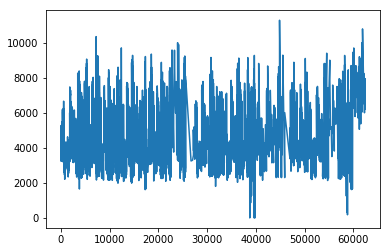

In [6]:
df = train_df.groupby(['Commodity']).get_group('gram')['modal_price']
plt.plot(df)

A distribution plot can also help us visualise the outliers.

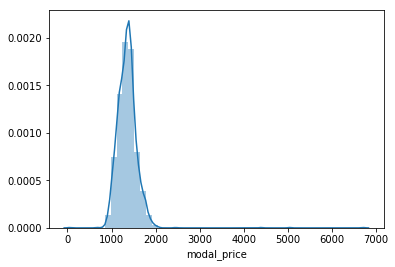

In [7]:
sns.distplot(train_df.groupby(['Commodity']).get_group('maize')['modal_price'])

Yes. We see quite a few outliers visually for modal prices of gram. In fact, some prices are zero.
These are clearly outliers and we need to filter them out!


This function takes in a dataframe. It then filters out all rows that have outliers in any column.
We group by Commodities and then check out if the modal price for the commodity statistically lies
in the non-outlier region or not. If it does not, we remove it. Masking and groupby-transform is used
to do this succintly.

The function returns out the dataset with outliers removed

In [8]:
def filter_outliers(data):
    
    out_data = (data[data.groupby("Commodity").modal_price.\
      transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(1)])
    
    return out_data

In [9]:
df_without_outliers = filter_outliers(train_df)

Now, let us check how prices of gram are distributed after removal of outliers.

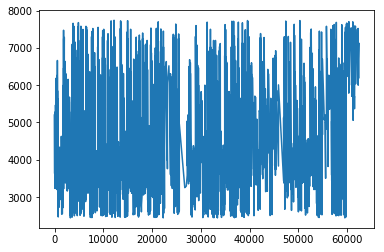

In [10]:
df = df_without_outliers.groupby(['Commodity']).get_group('gram')['modal_price']
plt.plot(df)

Perfect. Zero values that made no sense have been removed. Also, extremely high values have also been filtered out.

# Let us now just sanity test for a few more commodities

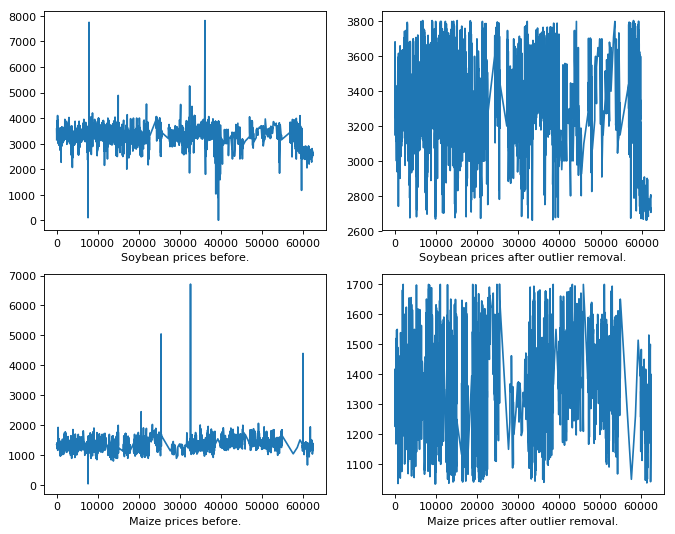

In [11]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

df = train_df.groupby(['Commodity']).get_group('soybean')['modal_price']
plt.subplot(221)
plt.xlabel("Soybean prices before.")
plt.plot(df)

df = df_without_outliers.groupby(['Commodity']).get_group('soybean')['modal_price']
plt.subplot(222)
plt.xlabel("Soybean prices after outlier removal.")
plt.plot(df)

df = train_df.groupby(['Commodity']).get_group('maize')['modal_price']
plt.subplot(223)
plt.xlabel("Maize prices before.")
plt.plot(df)

df = df_without_outliers.groupby(['Commodity']).get_group('maize')['modal_price']
plt.subplot(224)
plt.xlabel("Maize prices after outlier removal.")
plt.plot(df)


Pretty neat. There was a lot of noise before outliers were removed in the soybean commodity. However, after
removal the data is well distributed

Finally, let us save this dataset without outliers for further use.

In [12]:
df_without_outliers.to_csv('train_outliers_removed.csv')